In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
from pandas_profiling import ProfileReport

In [2]:
# !pip install tensorflow-gpu

In [3]:
import tensorflow as tf

In [4]:
print(tf.__version__)

2.8.2


In [5]:
data=pd.read_csv("Churn_Modelling.csv")

In [6]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


**Devide the data set into independent and dependent features**

**We dont need Rownumber customer Surname because it doesnt going to contribute in the model building**

In [7]:
X=data.iloc[:,3:-1]

In [8]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [9]:
y=data[["Exited"]]

In [10]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


# Feature Engineering and EDA

In [11]:
X.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
dtypes: float64(2), int64(6), object(2)
memory usage: 781.4+ KB


In [13]:
X.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000


**There are two catogorical feature, hence we need to handle it.The number of unique catagorical values are very less, so we can use one hot encoding**

In [14]:
X["Geography"].unique(), X["Gender"].unique()

(array(['France', 'Spain', 'Germany'], dtype=object),
 array(['Female', 'Male'], dtype=object))

In [15]:
geography=pd.get_dummies(X["Geography"],drop_first=True)
geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [16]:
gender=pd.get_dummies(X["Gender"],drop_first=True)

In [17]:
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [18]:
X.drop(["Geography","Gender"],axis=1,inplace=True)

In [19]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


**concatinate the one hot encording columns**

In [20]:
X=pd.concat([X,geography,gender],axis=1)

In [21]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


**Split the X into train and test**

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

**Feature Scaling**

In [24]:
from sklearn.preprocessing  import StandardScaler

In [25]:
sc=StandardScaler()

In [26]:
X_train=sc.fit_transform(X_train)

In [27]:
X_test=sc.transform(X_test)

# ANN implementation

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout

In [29]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [30]:
##lets initialise ANN 
classifier=Sequential()

In [31]:
##adding the i/p layer
classifier.add(Dense(units=11,activation="relu"))

In [35]:
##adding the first hidden layer
classifier.add(Dense(units=7,activation="relu"))
classifier.add(Dropout(0.2))

In [36]:
##adding the second hidden layers
classifier.add(Dense(units=6,activation="relu"))
classifier.add(Dropout(0.3))

In [37]:
##adding the o/p layer 
classifier.add(Dense(units=1,activation="sigmoid"))

In [38]:
import tensorflow

In [39]:
## early stopiing
import tensorflow as tf

early_stoping =tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [40]:
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [41]:
##compile
classifier.compile(optimizer=opt,loss="binary_crossentropy",metrics=["accuracy"])

In [42]:
##train
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stoping)

Epoch 1/1000
536/536 [==============================] - 4s 5ms/step - loss: 0.4961 - accuracy: 0.7946 - val_loss: 0.4439 - val_accuracy: 0.7955
Epoch 2/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4480 - accuracy: 0.7962 - val_loss: 0.4302 - val_accuracy: 0.7955
Epoch 3/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4348 - accuracy: 0.7962 - val_loss: 0.4210 - val_accuracy: 0.7955
Epoch 4/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4384 - accuracy: 0.7962 - val_loss: 0.4153 - val_accuracy: 0.7955
Epoch 5/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4326 - accuracy: 0.7962 - val_loss: 0.4252 - val_accuracy: 0.7955
Epoch 6/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4328 - accuracy: 0.7962 - val_loss: 0.4081 - val_accuracy: 0.7955
Epoch 7/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4286 - accuracy: 0.7962 - val_loss: 0.4106 - val_accuracy:

**Because using early stopping, it will stop automatically irrespective of number of epochs. As we used 1000 in this case.once loss function and accuracy constant then it will stop automatically the training
**

In [43]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

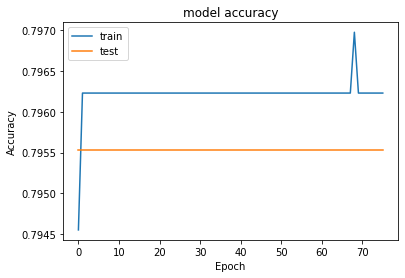

In [44]:
##summarize history of accuracy
plt.plot(model_history.history["accuracy"])
plt.plot(model_history.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["train","test"],loc="upper left")
plt.show()

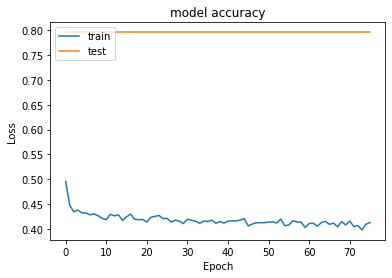

In [45]:
plt.plot(model_history.history["loss"])
plt.plot(model_history.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["train","test"],loc="upper left")
plt.show()

In [46]:
##making the prediction
##predicting the test results
y_pred=classifier.predict(X_test)
y_pred=(y_pred>=0.5)


In [47]:
##make the confusion matrics
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [48]:
##calculate accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)

In [49]:
score

0.7975

In [50]:
##get the weights
classifier.get_weights()

[array([[-1.80231810e+00,  7.48438299e-01,  1.25998592e+00,
         -2.28868723e-01,  4.15335327e-01, -8.38724136e-01,
         -5.81091493e-02,  4.28184211e-01,  3.92773151e-02,
          1.55435979e-01, -3.48891407e-01],
        [-4.32054371e-01,  8.10788989e-01, -5.57682514e-01,
          5.65502167e-01,  2.57995933e-01,  5.92094183e-01,
          3.52534592e-01, -1.43933070e+00, -8.11362267e-02,
         -3.23339844e+00, -7.25846469e-01],
        [ 1.87330878e+00,  1.76317334e-01,  2.30150795e+00,
          8.41487478e-03,  5.79709053e-01,  7.40555763e-01,
         -2.17054591e-01,  9.85248327e-01,  3.93564910e-01,
          4.69062030e-01,  8.10617983e-01],
        [ 8.01180899e-01,  1.17758214e+00, -1.09217989e+00,
         -3.78709108e-01, -3.99025440e+00, -3.60471845e+00,
         -4.67956215e-01, -2.20235848e+00, -2.41284341e-01,
          3.62988532e-01,  2.58892632e+00],
        [ 1.16567135e-01, -3.61938238e-01, -1.35308444e-01,
          4.75427103e+00,  2.18689370e+00, -